In [1]:
%cd /content/drive/MyDrive/0Thiland Coordination

/content/drive/MyDrive/0Thiland Coordination


In [2]:
!pip install geopandas
!pip install wget
!pip install rioxarray

     |████████████████████████████████| 994 kB 7.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 1.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e87e241ea58657e662f1442153c04a5e3eff43bba51e97910a10ca61113b0b15
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 46 kB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.7.0-py3-none-any.whl size=53826 sha256=00eb1511025de6fab2fe88142351f9bcc104691472d27356c6d0dd4ebe966d09
  Stored in directory: /root/.cache/pip/wheels/64/25/e2/1d0324f336102268cae46738e21018b35b23a5adc3f9088a38
Successfully built rioxarray


In [3]:
import wget
import pickle
import pandas as pd

import numpy as np
import geopandas as gpd
import pandas as pd
import numpy as np
import pickle
import os
import tarfile
import xarray
from matplotlib import pyplot as plt
from sklearn import  metrics
from scipy.cluster.hierarchy import dendrogram

import rioxarray as xr
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [4]:

from sklearn.cluster import  AgglomerativeClustering, KMeans

## Utils


In [5]:
def cluster_with_kmeans(df,n=5):
  kmeans = KMeans(n_clusters=n,max_iter=10000,n_init=20).fit(df)

  clusters_dict={}
  l=kmeans.labels_
  for i,c in enumerate(l):
    if c in clusters_dict:
      clusters_dict[c].append(i)
    else:
      clusters_dict[c]=[i,]

  clusters_dict_names={}
  for k in clusters_dict:
    clusters_dict_names[k]=[]
    for city_idx in clusters_dict[k]:
      clusters_dict_names[k].append(idx_name[city_idx])
  
  return clusters_dict_names,l


def agg_clustering(df,n=5,link='ward'):
  AC=AgglomerativeClustering(n_clusters=n,linkage=link).fit(df)
  clusters_dict={}
  l=AC.labels_
  for i,c in enumerate(l):
    if c in clusters_dict:
      clusters_dict[c].append(i)
    else:
      clusters_dict[c]=[i,]

  clusters_dict_names={}
  for k in clusters_dict:
    clusters_dict_names[k]=[]
    for city_idx in clusters_dict[k]:
      clusters_dict_names[k].append(idx_name[city_idx])
  
  return AC,clusters_dict_names,l


def viz_clusters(df,clusters_dict_names,inc_names=False):

  plt.figure(figsize=(10,10))  
  for c in clusters_dict_names.keys():
    cities=clusters_dict_names[c]
    inds=[]
    for city in cities:
      inds.append(name_idx[city])
    

    
    pts=df[inds]
    plt.scatter(pts[:,0],pts[:,1])
    _avg=np.mean(pts,axis=0)
    plt.annotate(c,(_avg[0],_avg[1]))


  v=[clusters_dict_names[k][0] for k in clusters_dict_names.keys()]  
  plt.legend(v)  
  plt.show()

  if inc_names:
    plt.figure(figsize=(30,20))
    for c in clusters_dict_names.keys():
      cities=clusters_dict_names[c]
      inds=[]
      for city in cities:
        inds.append(name_idx[city])
      

      
      pts=df[inds]
      plt.scatter(pts[:,0],pts[:,1])
      for ind in inds:
        plt.text(df[ind,0],df[ind,1],idx_name[ind],fontsize=15)
    
    plt.show()

    

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def evaluate_clustering(df,labels):
  return metrics.silhouette_score(df, labels, metric='euclidean'),metrics.calinski_harabasz_score(df, labels)

def get_clus_dist(dict_clus):
  c_num={}
  n=len(dict_clus)
  for k in dict_clus:
    c_num[k]=len(dict_clus[k])
  
  plt.bar(list(range(n)),c_num)
  return c_num

# new_all_cities_file = os.path.join("GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0", "GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg")
# new_all_cities_gdf = gpd.read_file(new_all_cities_file)
# new_all_cities_gdf_filterd_2=new_all_cities_gdf[new_all_cities_gdf['FUA_p_2015'] > 5000000 ]


## Analysis of Pop & area 

In [181]:
new_all_cities_gdf.loc['UNNAMED']

,eFUA_ID,UC_num,UC_IDs,Commuting,Cntry_ISO,Cntry_name,FUA_area,UC_area,FUA_p_2015,UC_p_2015,Com_p_2015,geometry
eFUA_name,,,,,,,,,,,,
UNNAMED,2921.0,1.0,3249,1.0,AGO,Angola,8.0,5.0,89775.818081,88585.783447,1190.034634,"MULTIPOLYGON (((1606000.000 -1461000.000, 1603..."
UNNAMED,796.0,1.0,9584,1.0,BGD,Bangladesh,15.0,8.0,122350.509521,117919.764648,4430.744873,"MULTIPOLYGON (((8323000.000 3157000.000, 83250..."
UNNAMED,1244.0,1.0,3221,0.0,TCD,Chad,8.0,8.0,70558.172852,70558.172852,0.000000,"MULTIPOLYGON (((1542000.000 1187000.000, 15410..."
UNNAMED,7028.0,1.0,10467,1.0,CHN,China,34.0,9.0,75594.104637,63411.974365,12182.130272,"MULTIPOLYGON (((9670000.000 3265000.000, 96710..."
UNNAMED,8125.0,1.0,10970,1.0,CHN,China,148.0,24.0,114350.043653,66110.757812,48239.285840,"MULTIPOLYGON (((10039000.000 4666000.000, 1004..."
...,...,...,...,...,...,...,...,...,...,...,...,...
UNNAMED,171.0,1.0,6029,0.0,TJK,Tajikistan,5.0,5.0,95430.196777,95430.196777,0.000000,"MULTIPOLYGON (((5865000.000 4786000.000, 58660..."
UNNAMED,3331.0,1.0,5234,1.0,TZA,Tanzania,37.0,19.0,79531.746338,67958.787476,11572.958862,"MULTIPOLYGON (((3902000.000 -862000.000, 39010..."
UNNAMED,1261.0,1.0,3710,0.0,ZMB,Zambia,7.0,7.0,69384.873779,69384.873779,0.000000,"MULTIPOLYGON (((2648000.000 -2134000.000, 2647..."


In [177]:
new_all_cities_file = os.path.join("GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0", "GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg")
new_all_cities_gdf = gpd.read_file(new_all_cities_file)
new_all_cities_gdf_filterd_2=new_all_cities_gdf
# new_all_cities_gdf_filterd_2.drop_duplicates('eFUA_name',inplace=True)
# new_all_cities_gdf_filterd_2.sort_values('FUA_p_2015',ascending=False,inplace=True)


In [7]:
## Handle city light
dgf=gpd.read_file('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/cities_pop_light.geojson')
clnames=['eFUA_name','geometry','CL2014',	'CL2013',	'CL2018',	'CL2016',	'CL2019',	'CL2020',	'CL2015',	'CL2017',	'CL2012']
ld=dgf.loc[:,clnames]
ld.set_index(ld.eFUA_name,inplace=True)
ld.drop_duplicates('eFUA_name',inplace=True)
subdf=ld.loc[new_all_cities_gdf_filterd_2.eFUA_name,:]
subdf.drop(['eFUA_name','geometry'],axis=1,inplace=True)
cl_df=subdf

cl_df.shape


(8641, 9)

In [8]:
## Handle area dict
area_dict=pickle.load(open('/content/drive/MyDrive/0Thiland Coordination/Built Up data/all_area_dict.pickle','rb'))
area_dict_re={}
for k in area_dict:
  area_dict_re[k]=np.array(area_dict[k][0][1:])/255.0
area_df=pd.DataFrame.from_dict(area_dict_re,orient='index',columns=['1990_area','2000_area','2015_area','water'])
pop_df=pickle.load(open('/content/drive/MyDrive/0Thiland Coordination/Population/population_df_all.pickle','rb'))

new_all_cities_gdf_filterd_2.set_index('eFUA_name',inplace=True)
popind=list(pop_df.index)
areaind=list(area_df.index)
jointind=[]
for ind in popind:
  if ind in areaind :
    jointind.append(ind)

len(jointind)
pop_df_sub=pop_df.loc[jointind,:]
area_df_sub=area_df.loc[jointind,:]
gdf_sub=new_all_cities_gdf_filterd_2.loc[jointind,:]
cl_sub=cl_df.loc[jointind,:]
area_df.shape,pop_df.shape

((8624, 4), (8641, 3))

In [11]:
# new_all_cities_gdf_filterd_2.set_index('eFUA_name',inplace=True)
# new_all_cities_gdf_filterd_2.set_index('eFUA_name',inplace=True)
# popind=list(pop_df.index)
# areaind=list(area_df.index)
# jointind=[]
# for ind in popind:
#   if ind in areaind :
#     jointind.append(ind)

# len(jointind)

In [12]:
# new_all_cities_gdf_filterd_2.set_index('eFUA_name',inplace=True)
# popind=list(pop_df.index)
# areaind=list(area_df.index)
# jointind=[]
# for ind in popind:
#   if ind in areaind :
#     jointind.append(ind)

# len(jointind)
# pop_df_sub=pop_df.loc[jointind,:]
# area_df_sub=area_df.loc[jointind,:]
# gdf_sub=new_all_cities_gdf_filterd_2.loc[jointind,:]
# cl_sub=cl_df.loc[jointind,:]

In [ ]:
gdf_sub

In [15]:
new_df=pd.concat([area_df_sub['2015_area'],pop_df_sub['2015_Pop'],cl_sub['CL2015']],axis=1)
new_df['Country']=gdf_sub['Cntry_name']

In [16]:
all_data=pickle.load(open('/content/drive/MyDrive/0Thiland Coordination/all_data_with_st_nonvi.pickle','rb'))
all_data['1990_area']*=gdf_sub['FUA_area']
all_data['2000_area']*=gdf_sub['FUA_area']
all_data['2015_area']*=gdf_sub['FUA_area']

In [17]:
all_data.dropna(inplace=True)
all_data.drop(['stl1_1990_min','stl1_1990_max','stl1_2000_min','stl1_2000_max_x','stl1_2015_min','stl1_2000_max_y','stl1_1990_range','stl1_2000_range','stl1_2015_range'],axis=1,inplace=True)

In [ ]:
all_data.to_csv('all_data_novi.csv')

In [18]:
all_data.isna().sum()

1990_area            0
2000_area            0
2015_area            0
water                0
1990_Pop             0
2000_Pop             0
2015_Pop             0
CL2014               0
CL2013               0
CL2018               0
CL2016               0
CL2019               0
CL2020               0
CL2015               0
CL2017               0
CL2012               0
stl1_1990_average    0
stl1_1990_median     0
stl1_1990_std        0
stl1_2000_average    0
stl1_2000_median     0
stl1_2000_std        0
stl1_2015_average    0
stl1_2015_median     0
stl1_2015_std        0
dtype: int64

In [ ]:
all_data.iloc[:,0:7].corr()

,1990_area,2000_area,2015_area,water,1990_Pop,2000_Pop,2015_Pop
1990_area,1.000000,0.994626,0.983687,0.064005,0.747183,0.738422,0.704525
2000_area,0.994626,1.000000,0.996064,0.058994,0.743124,0.737501,0.708859
2015_area,0.983687,0.996064,1.000000,0.055334,0.737136,0.734652,0.711433
water,0.064005,0.058994,0.055334,1.000000,0.039825,0.040062,0.040213
1990_Pop,0.747183,0.743124,0.737136,0.039825,1.000000,0.987349,0.954084
2000_Pop,0.738422,0.737501,0.734652,0.040062,0.987349,1.000000,0.985045
2015_Pop,0.704525,0.708859,0.711433,0.040213,0.954084,0.985045,1.000000


In [ ]:
sel_cols=['2015_area','2015_Pop','CL2015','stl1_2015_average']

In [ ]:
print(all_data.iloc[:,0:7].mean())
print(all_data.iloc[:,0:7].std())

1990_area     54870.866729
2000_area     68517.404399
2015_area     79551.088783
water             0.020387
1990_Pop     305794.557340
2000_Pop     355021.395500
2015_Pop     428132.975294
dtype: float64
1990_area    2.845351e+05
2000_area    3.374044e+05
2015_area    3.840974e+05
water        5.120563e-02
1990_Pop     9.499168e+05
2000_Pop     1.084490e+06
2015_Pop     1.339539e+06
dtype: float64


In [ ]:
all_data

,1990_area,2000_area,2015_area,water,1990_Pop,2000_Pop,2015_Pop,CL2014,CL2013,CL2018,CL2016,CL2019,CL2020,CL2015,CL2017,CL2012,stl1_1990_average,stl1_1990_median,stl1_1990_std,stl1_2000_average,stl1_2000_median,stl1_2000_std,stl1_2015_average,stl1_2015_median,stl1_2015_std,1990_area_r,2000_area_r,2015_area_r
eFUA_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Herat,8.715073,11.900312,14.276641,0.0,213006.605779,426648.140152,888412.120943,3049.714355,3733.459717,2585.224609,2769.015625,2654.369141,2919.856689,2891.679199,2690.201172,2988.929688,290.01670,290.04538,9.640500,290.79623,293.05960,9.862977,290.83765,292.43967,9.677377,0.062698,0.085614,0.102710
Guzarah,0.102157,0.192478,2.111033,0.0,26349.751259,64305.935510,170451.152350,597.604248,589.797913,608.627686,554.141907,557.916748,575.329041,585.096436,598.004517,532.822693,289.61320,289.25082,9.321258,290.36694,292.24582,9.606232,290.45688,291.70023,9.304160,0.003192,0.006015,0.065970
Shindand,0.102282,0.161999,0.263646,0.0,47323.586929,90421.388078,147161.157247,0.703916,0.784238,0.000000,0.331459,0.000000,0.000000,0.412773,0.403802,0.673873,292.52686,291.93506,10.566477,293.39465,295.52362,10.400875,293.10132,294.16260,10.169315,0.008523,0.013500,0.021970
Qala i Naw,0.449251,0.558444,0.727537,0.0,18017.408444,37402.837135,80236.341196,23.787598,34.644650,34.900375,15.612888,41.787052,51.049355,16.037046,26.678501,34.603470,287.94357,287.18542,8.292397,288.29813,289.13046,8.703105,288.72476,289.17480,8.341198,0.149750,0.186148,0.242512
Farah,2.340460,3.330178,4.432838,0.0,35507.148913,67522.513251,131997.091740,60.316994,48.729088,95.830223,80.960709,110.094147,130.444397,63.528755,124.822403,50.076710,296.00693,296.37360,11.112401,296.68146,298.97638,10.710597,296.51837,297.67426,10.641140,0.073139,0.104068,0.138526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triangle,0.125392,0.137147,0.141850,0.0,89407.454071,61143.415303,60790.183151,94.089249,103.383041,80.512131,78.909561,93.573715,87.168274,89.742241,79.573692,100.583519,299.20220,299.75270,2.954742,296.67627,297.78546,3.596118,300.35803,299.50967,3.631617,0.025078,0.027429,0.028370
Glenclova,0.314885,0.332468,0.338861,0.0,118973.481602,131995.959494,158164.077305,7.481688,12.262483,30.298409,12.254866,33.786125,27.549053,12.236619,21.924496,10.041859,294.41394,294.59164,2.877471,292.59457,294.24170,3.397215,295.06732,295.54254,3.337797,0.078721,0.083117,0.084715
Bindura,2.213666,3.918377,4.461753,0.0,70260.847950,88114.318332,109618.822171,330.508820,428.595154,442.246857,422.016327,458.711792,545.772949,410.326019,462.969116,399.073547,296.27982,296.45596,2.592929,295.10770,296.03857,2.987292,296.30530,296.05396,3.376487,0.040994,0.072563,0.082625


In [19]:
all_data[['1990_area_r','2000_area_r','2015_area_r']]=area_df.loc[all_data.index,['1990_area','2000_area','2015_area']]


In [20]:
inds=list(range(7))+[27,26,25]

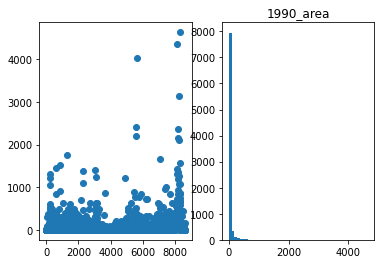

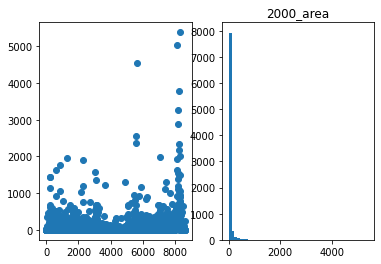

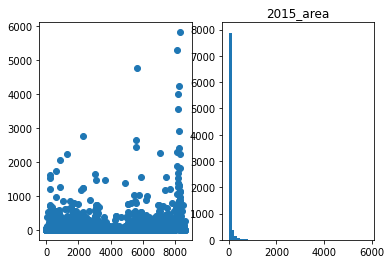

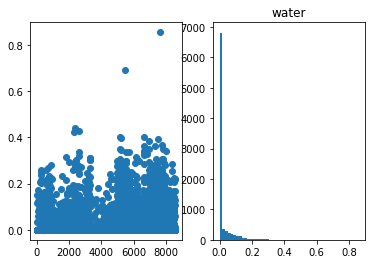

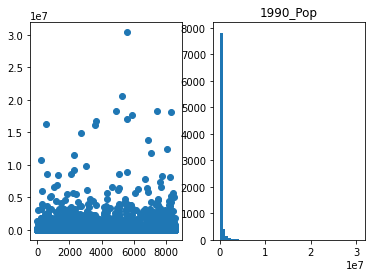

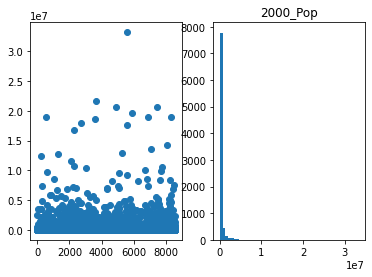

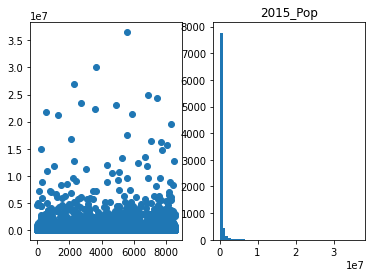

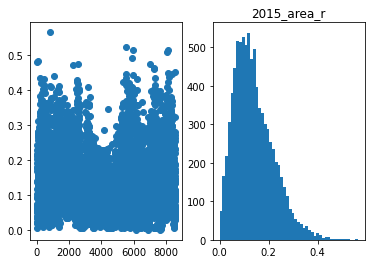

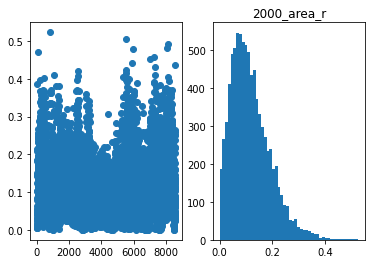

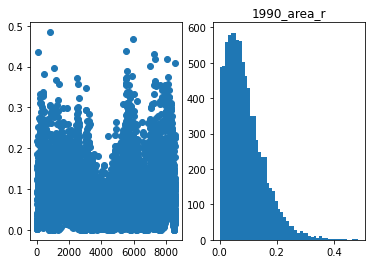

In [ ]:
sub_df=all_data.iloc[:,inds]

for c in sub_df.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2)

  ax1.scatter(range(len(sub_df[c])),sub_df[c])
  ax2.hist(sub_df[c],bins=50)

  plt.title(c)
  plt.show()

In [ ]:
all_data_no=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/all_data_noni_nooutliers_.csv')
all_data_o=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/all_data_noni_outliers_.csv')
all_data_no.set_index('eFUA_name',inplace=True)
all_data_o.set_index('eFUA_name',inplace=True)

In [ ]:
# add area ratio
all_data_no[['1990_area_r','2000_area_r','2015_area_r']]=area_df.loc[all_data_no.index,['1990_area','2000_area','2015_area']]
all_data_o[['1990_area_r','2000_area_r','2015_area_r']]=area_df.loc[all_data_o.index,['1990_area','2000_area','2015_area']]

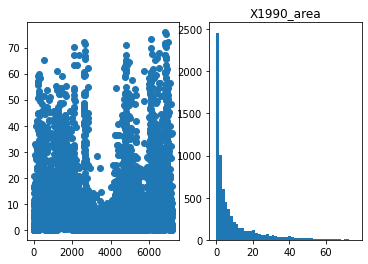

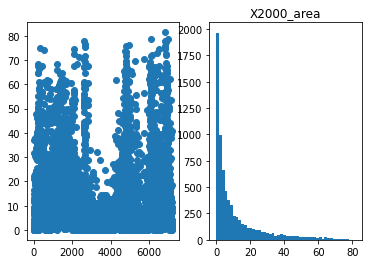

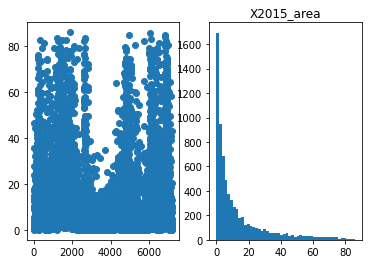

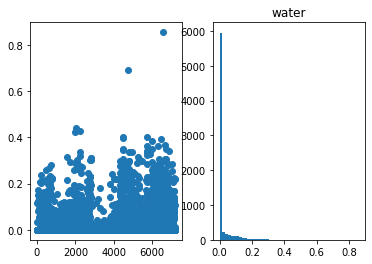

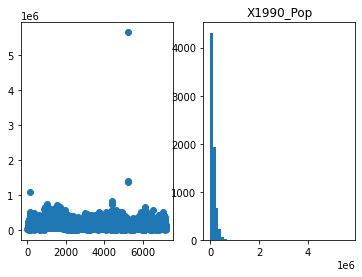

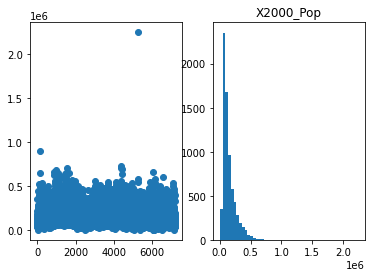

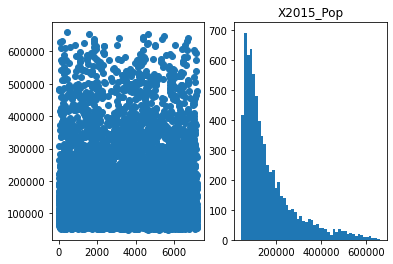

In [ ]:
sub_df=all_data_no.iloc[:,0:7]

for c in sub_df.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2)

  ax1.scatter(range(len(sub_df[c])),sub_df[c])
  ax2.hist(sub_df[c],bins=50)

  plt.title(c)
  plt.show()

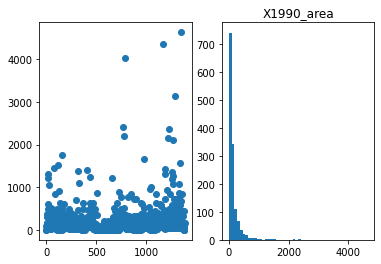

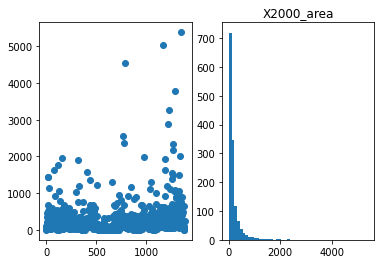

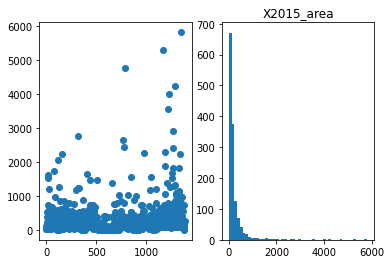

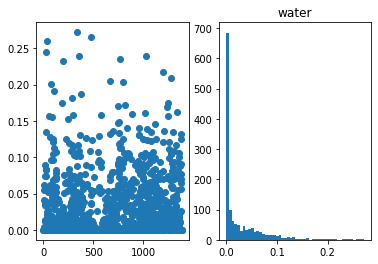

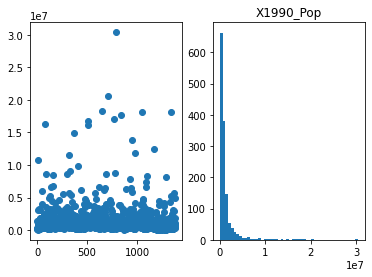

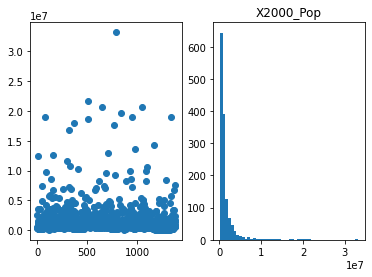

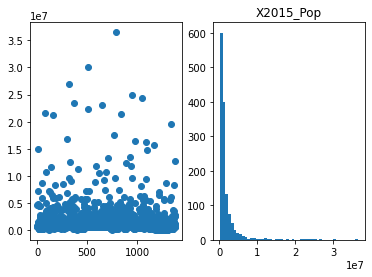

In [ ]:
sub_df=all_data_o.iloc[:,0:7]

for c in sub_df.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2)

  ax1.scatter(range(len(sub_df[c])),sub_df[c])
  ax2.hist(sub_df[c],bins=50)

  plt.title(c)
  plt.show()

In [ ]:
sel_cols=['2015_Pop','2015_area','2015_area_r']
sel_cols2=['X2015_Pop','X2015_area','2015_area_r']

all_data[sel_cols].mean()

2015_Pop       428132.975294
2015_area          49.048244
2015_area_r         0.140484
dtype: float64

In [ ]:

print(all_data_no[sel_cols2].mean())
print(all_data_o[sel_cols2].mean())


X2015_Pop      169608.498725
X2015_area         13.344790
2015_area_r         0.133134
dtype: float64
X2015_Pop      1.773767e+06
X2015_area     2.348867e+02
2015_area_r    1.787418e-01
dtype: float64


In [ ]:
sel_cols=['X2015_Pop','X2015_area','2015_area_r']

print(-all_data_no[sel_cols].mean()+all_data_o[sel_cols].mean())


X2015_Pop      1.604158e+06
X2015_area     2.215419e+02
2015_area_r    4.560812e-02
dtype: float64


In [ ]:
import seaborn as sns

In [ ]:
# plt.plot()

             2015_Pop  2015_area  2015_area_r
2015_Pop     1.000000   0.711433     0.179490
2015_area    0.711433   1.000000     0.240035
2015_area_r  0.179490   0.240035     1.000000


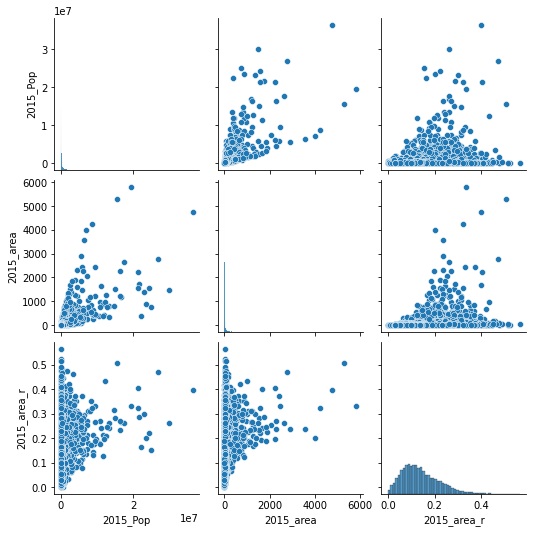

In [ ]:
sel_cols=['2015_Pop','2015_area','2015_area_r']
sub_df=all_data[sel_cols]
print(sub_df.corr())
sns.pairplot(sub_df)

             X2015_Pop  X2015_area  2015_area_r
X2015_Pop     1.000000    0.527387     0.027844
X2015_area    0.527387    1.000000     0.376515
2015_area_r   0.027844    0.376515     1.000000


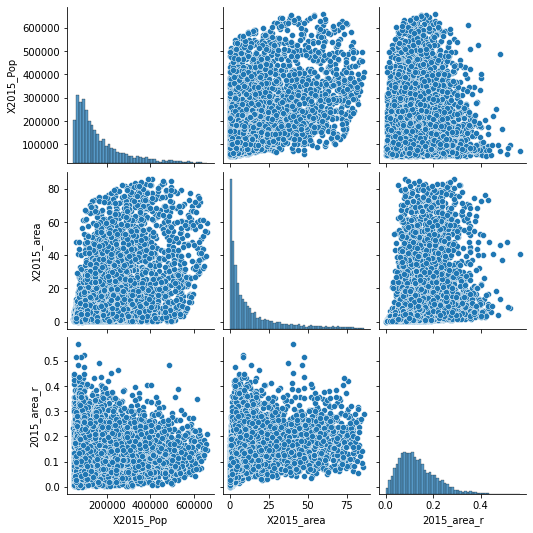

In [ ]:
sel_cols=['X2015_Pop','X2015_area','2015_area_r']
sub_df=all_data_no[sel_cols]
print(sub_df.corr())

sns.pairplot(sub_df)

             X2015_Pop  X2015_area  2015_area_r
X2015_Pop     1.000000    0.645592     0.241257
X2015_area    0.645592    1.000000     0.343837
2015_area_r   0.241257    0.343837     1.000000


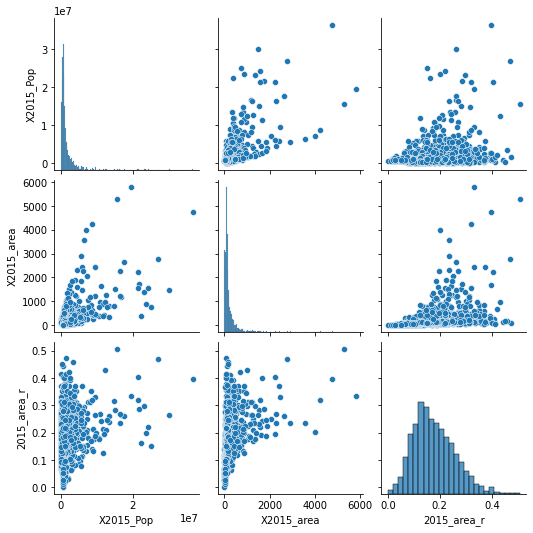

In [ ]:
sel_cols=['X2015_Pop','X2015_area','2015_area_r']
sub_df=all_data_o[sel_cols]
print(sub_df.corr())

sns.pairplot(sub_df)

## Area vs Pop graphs

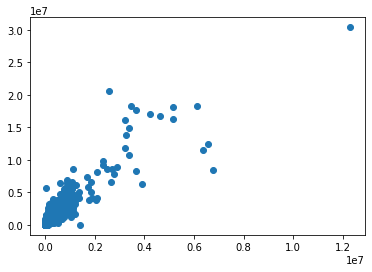

In [ ]:
plt.scatter((area_df_sub['1990_area'].values),(pop_df_sub['1990_Pop'].values))

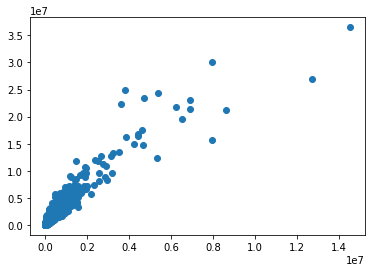

In [ ]:
plt.scatter((area_df_sub['2015_area'].values),(pop_df_sub['2015_Pop'].values))

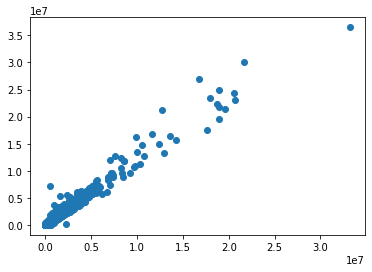

In [ ]:
plt.scatter(pop_df_sub['2000_Pop'],pop_df_sub['2015_Pop'])

In [ ]:
all_df=pd.concat([area_df_sub,pop_df_sub],axis=1)

In [ ]:
all_df2=np.log(all_df+1)

In [ ]:
all_df['1990_area'].value_counts()

0.000000         12
23656.691425      1
206964.137087     1
9020.691408       1
6573.427558       1
                 ..
82477.178255      1
22592.851647      1
1267.884613       1
13313.767731      1
2123.533722       1
Name: 1990_area, Length: 8613, dtype: int64

In [ ]:
all_df2.drop('water',axis=1,inplace=True)

In [ ]:
all_df.loc[['New York','Cairo','Guzarah','Minsk']]

,1990_area,2000_area,2015_area,water,1990_Pop,2000_Pop,2015_Pop
New York,5.167606e+06,6.007208e+06,6.496234e+06,0.081674,1.815490e+07,1.891228e+07,1.952310e+07
Cairo,3.369613e+06,4.073255e+06,4.690421e+06,0.008024,1.494485e+07,1.791283e+07,2.348653e+07
Guzarah,5.410786e+02,1.019471e+03,1.118119e+04,0.000000,2.634975e+04,6.430594e+04,1.704512e+05
Minsk,2.606407e+05,3.141956e+05,3.684362e+05,0.008744,1.706020e+06,1.884094e+06,2.137300e+06


In [ ]:
# all_df.loc[:,['2015_area','2015_Pop']].to_csv('ar_pop_2015.csv')

In [ ]:
dfno=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/ar_pop_no.csv')

In [ ]:
dfno.set_index('X',inplace=True)

In [ ]:
idx_name={i:name for i,name in enumerate(dfno.index)}
name_idx={name:i for i,name in enumerate(dfno.index)}

In [ ]:
X_scaled.mean(axis=0)

array([-2.35639173e-16,  5.71795754e-16,  2.17513082e-16,  1.10404368e-16,
       -3.46043540e-16,  3.13087013e-16])

In [ ]:
X=dfno.values
X_scaled=(X-X.mean(axis=0))/X.std(axis=0)

In [ ]:
X_scaled.std(0)

array([1., 1.])

In [ ]:
clus_names,clus,=cluster_with_kmeans(X_scaled,3)

In [ ]:
evaluate_clustering(X_scaled,clus)

(0.5138782057475755, 11889.737543342253)

In [ ]:
x,y=np.unique(clus,return_counts=True)

<BarContainer object of 3 artists>

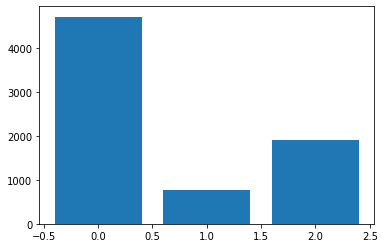

In [ ]:
plt.bar(x,y)

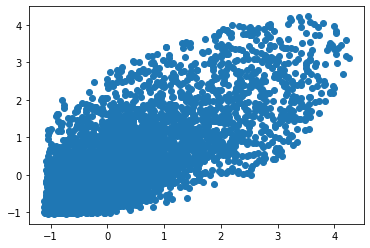

In [ ]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])

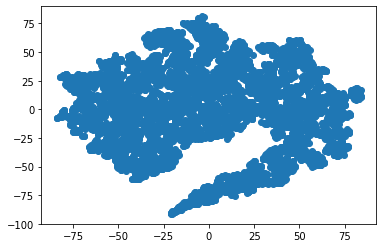

In [ ]:
from sklearn.manifold import TSNE
ts=TSNE(2)
X_2d2=ts.fit_transform(X_scaled)
import matplotlib.pyplot as plt
plt.scatter(X_2d2[:,0],X_2d2[:,1])

# Clustering

In [6]:
df_nondvi=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/Soc_econ_data_4paper.csv')
df_nondvi.set_index('eFUA_name',inplace=True)
X=df_nondvi.values
rows,cols=X.shape

X_scaled=((df_nondvi-df_nondvi.mean())/df_nondvi.std()).values
X_scaled.mean(axis=0)


array([ 3.34022883e-16,  2.77801209e-16, -2.64572580e-16,  1.58743548e-16,
        7.83796269e-16, -1.87681174e-16, -7.49732549e-15,  4.24638991e-15,
       -3.02935604e-15, -2.64572580e-17])

In [7]:
all_data_no=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/all_data_noni_nooutliers_.csv')
all_data_o=pd.read_csv('/content/drive/MyDrive/0Thiland Coordination/CSV Datasets/all_data_noni_outliers_.csv')
all_data_no.set_index('eFUA_name',inplace=True)
all_data_o.set_index('eFUA_name',inplace=True)

In [8]:
X=all_data_no.values
rows,cols=X.shape

X_scaled=((all_data_no-all_data_no.mean())/all_data_no.std()).values
X_scaled.mean(axis=0)

array([ 4.41563526e-16, -1.79779435e-15,  3.64289909e-15, -7.88506296e-18,
       -5.89014203e-15, -1.22908419e-15,  3.74540490e-16,  1.56124247e-15,
        2.01069105e-15, -3.94253148e-17])

## Regular AC

In [9]:
X_scaled.std(0)

array([0.99993064, 0.99993064, 0.99993064, 0.99993064, 0.99993064,
       0.99993064, 0.99993064, 0.99993064, 0.99993064, 0.99993064])

In [13]:
from sklearn.cluster import AgglomerativeClustering,KMeans,AffinityPropagation
from sklearn.metrics import davies_bouldin_score

In [14]:
cls_scr_sc={}
cls_scr_r={}

for n_c in range(3,10):
  ag=AgglomerativeClustering(n_clusters=n_c,linkage='ward')
  ag.fit(X_scaled)
  r=evaluate_clustering(X_scaled,ag.labels_)
  print(r,davies_bouldin_score(X_scaled, ag.labels_))
  x,y=np.unique(ag.labels_,return_counts=True)
  print(y)
  cls_scr_sc[n_c]=r[-1]
  cls_scr_r[n_c]=r[0]


(0.3491584999710512, 3177.3479484624518) 0.987625695194775
[5305  778 1126]
(0.34673378974170815, 3216.418134186689) 1.261313087641877
[ 778 4063 1126 1242]
(0.34989145068236716, 2818.18493503889) 1.2892309637117583
[4063  285 1126 1242  493]
(0.20932314220217654, 2589.1102742402236) 1.311479075321402
[ 285 1242 1126 2359  493 1704]
(0.20911123811101417, 2478.036541556712) 1.128376897210352
[1242  493 1126 2359  284 1704    1]
(0.21720318091412566, 2412.250020669231) 1.1816462655980309
[ 493 2359 1126  463  284 1704    1  779]
(0.2223456294264019, 2387.8105659765038) 1.1351740386189229
[1126 2359 1704  463  284  317    1  779  176]


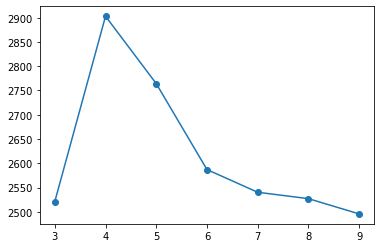

In [30]:
# scores
plt.scatter(cls_scr_sc.keys(),cls_scr_sc.values())
plt.plot(list(cls_scr_sc.keys()),list(cls_scr_sc.values()))


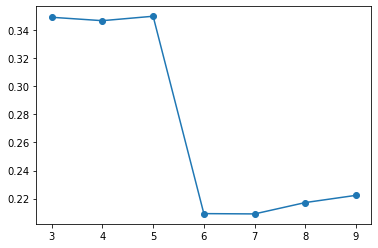

In [28]:
# scores
plt.scatter(cls_scr_r.keys(),cls_scr_r.values())
plt.plot(list(cls_scr_r.keys()),list(cls_scr_r.values()))


<BarContainer object of 6 artists>

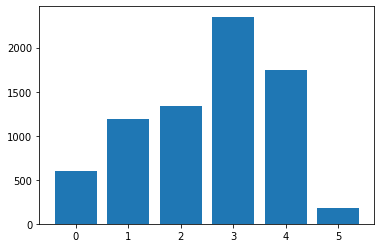

In [ ]:
plt.bar(range(6),[ 597 ,1185, 1339, 2351, 1742 , 183])

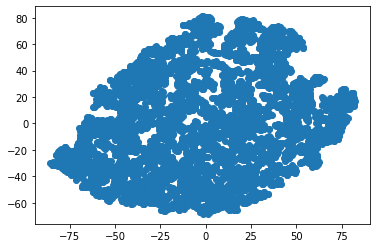

In [33]:
from sklearn.manifold import TSNE
ts=TSNE(2)
X_2d2=ts.fit_transform(X_scaled)
import matplotlib.pyplot as plt
plt.scatter(X_2d2[:,0],X_2d2[:,1])

In [34]:
idx_name={i:name for i,name in enumerate(all_data_no.index)}
name_idx={name:i for i,name in enumerate(all_data_no.index)}


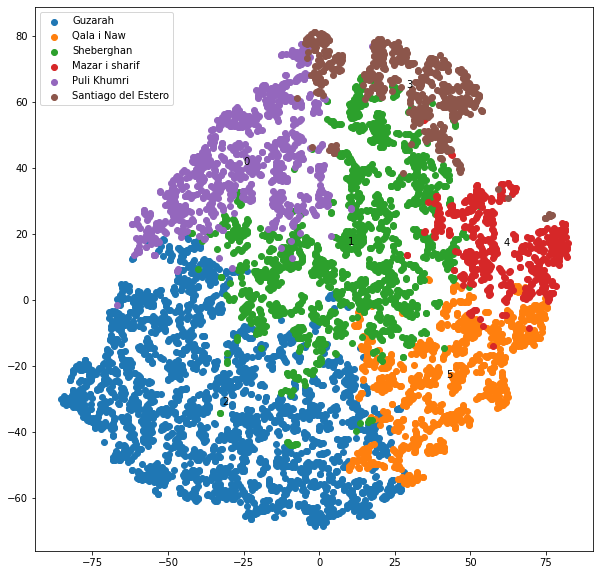

In [36]:
ag_model,clus_names,clus,=agg_clustering(X_scaled[:,:-1],6)
viz_clusters(X_2d2,clus_names)

## Try VAE + Linear

### VAE Arch

In [ ]:
df_all_cl=pickle.load(open('/content/drive/MyDrive/0Thiland Coordination/pickle_files/nondvi_withcity_lights.pkl','rb'))

In [61]:
import tensorflow as tf
keras=tf.keras
import tensorflow.keras.backend as K

In [118]:

latent_dim=10
rows,cols=X_scaled.shape

In [119]:

class Sample(tf.keras.layers.Layer):
  def call(self,inputs):
    mu,sigma=inputs
    shapes=tf.shape(mu)
    batch=shapes[0]
    col=shapes[1]
    eps=K.random_normal((batch,col))
    Z=mu+eps*tf.exp(sigma*0.5)
    return Z

In [120]:

def encoder_layers(inputs,latent_dim):

  ## Encoder Layers

  x=keras.layers.Dense(int(16),activation='relu')(inputs)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.Dense(int(8),activation='relu')(x)
  x=keras.layers.BatchNormalization()(x)
  mu=keras.layers.Dense(latent_dim)(x)
  sigma=keras.layers.Dense(latent_dim)(x)

  return mu,sigma

def encoder_model(input_shape,latent_dim):

  inputs=keras.layers.Input(shape=input_shape)
  mu,sigma=encoder_layers(inputs,latent_dim)

  Z=Sample()([mu,sigma])

  enc_model=keras.models.Model(inputs=inputs,outputs=[mu,sigma,Z])

  return enc_model






In [124]:
X_scaled.std(axis=0)

array([0.99993064, 0.99993064, 0.99993064, 0.99993064, 0.99993064,
       0.99993064, 0.99993064, 0.99993064, 0.99993064, 0.99993064])

In [125]:
def decoder_layers(inputs):

  ## Decoder Layers
  x=keras.layers.Dense(6,activation='relu')(inputs)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.Dense(cols,activation='relu')(x)
  x=keras.layers.BatchNormalization()(x)
  x=keras.layers.Dense(cols,activation='linear')(x)

  return x


def decoder_model(latent_dim):
  inputs=keras.layers.Input(shape=latent_dim)
  outpus=decoder_layers(inputs)

  dec_model=keras.models.Model(inputs,outpus)
  return dec_model



In [126]:

def KL_loss(inputs, outputs, mu, sigma):

  los=tf.keras.losses.mean_squared_error(inputs,outputs)
  kl_loss = -0.5 * (1 + sigma - tf.square(mu) - tf.exp(sigma))
  kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
  # kl_loss = (1 + sigma - tf.square(mu) - tf.math.exp(sigma))* -0.5
  return kl_loss+los

def mse_loss(inputs,outputs):

  los=tf.keras.losses.mean_squared_error(inputs,outputs)
  return los

In [127]:
def vae_model(input_shape,encoder,decoder):
  inputs=keras.layers.Input(shape=input_shape)
  mu,sigma,Z=encoder(inputs)
  dec_output=decoder(Z)
  model=keras.models.Model(inputs,dec_output)
  losskl=KL_loss(inputs,dec_output,mu,sigma)
  # mse = tf.keras.losses.mean_squared_error(inputs,dec_output)#mse_loss(inputs,dec_output)
  model.add_loss(losskl)
  # model.add_loss(mse)
  return model

In [154]:
encoder=encoder_model(cols,latent_dim)
decoder=decoder_model(latent_dim)
vae=vae_model(cols,encoder,decoder)

In [155]:
vae.compile(optimizer='adam',metrics=['mse'])

In [156]:
hist=vae.fit(X_scaled,X_scaled,epochs=60)

Epoch 1/60
226/226 [==============================] - 2s 2ms/step - loss: 4.4652 - mse: 1.2773
Epoch 2/60
226/226 [==============================] - 0s 2ms/step - loss: 1.5529 - mse: 1.0200
Epoch 3/60
226/226 [==============================] - 0s 2ms/step - loss: 1.1913 - mse: 1.0068
Epoch 4/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0921 - mse: 1.0059
Epoch 5/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0562 - mse: 1.0069
Epoch 6/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0371 - mse: 1.0041
Epoch 7/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0274 - mse: 1.0046
Epoch 8/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0192 - mse: 1.0022
Epoch 9/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0151 - mse: 1.0018
Epoch 10/60
226/226 [==============================] - 0s 2ms/step - loss: 1.0114 - mse: 1.0002
Epoch 11/60
226/226 [============================

In [164]:
## load model
encoder=keras.models.load_model('/content/drive/MyDrive/0Thiland Coordination/AE Models/encoder_nooutliers__novi_best.h5',custom_objects={'KL_loss':KL_loss,'Sample':Sample})

### VAE Testing and Results Exploration

In [166]:
X_enc,_,_=encoder(X_scaled[:,:-1])

In [167]:
np.std(X_enc,axis=0)


array([0.40877122, 0.02086642, 0.0157052 , 0.01505201, 0.01693485,
       0.04790347, 0.05020559, 0.00531892, 0.00830626], dtype=float32)

In [168]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

ts=TSNE(2)
X_2d=ts.fit_transform(X_enc)


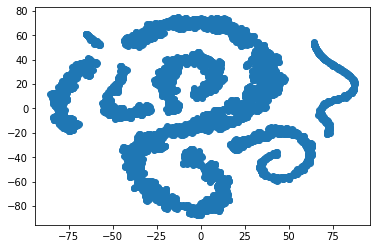

In [169]:
import matplotlib.pyplot as plt
plt.scatter(X_2d[:,0],X_2d[:,1])

In [170]:
 from sklearn.cluster import AgglomerativeClustering,KMeans

In [171]:
cls_scr_sc={}
cls_scr_r={}
for n_c in range(3,10):
  ag=AgglomerativeClustering(n_clusters=n_c,linkage='ward')
  ag.fit(X_enc)
  r=evaluate_clustering(X_enc,ag.labels_)
  print(r)
  x,y=np.unique(ag.labels_,return_counts=True)
  print(y)
  cls_scr_sc[n_c]=r[-1]
  cls_scr_r[n_c]=r[0]



(0.6715515, 14373.601416378422)
[5997  977  235]
(0.57679087, 20496.04516398417)
[ 977 2261  235 3736]
(0.5729766, 25899.59371295014)
[2261 3736  235  434  543]
(0.54350054, 28456.344266985154)
[3736  434  235 1022  543 1239]
(0.5221856, 30069.4551910045)
[ 235  434 2232 1022  543 1239 1504]
(0.5154855, 33202.186861281516)
[ 434  112 2232 1022  543 1239 1504  123]
(0.5180017, 37710.67665262577)
[ 112 1022 2232  237  543 1239 1504  123  197]


<BarContainer object of 7 artists>

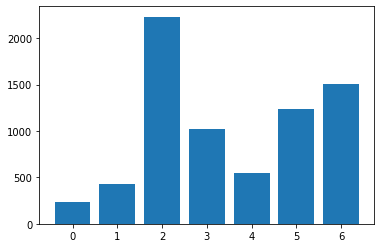

In [ ]:
plt.bar(range(7),[ 235,  434, 2232, 1022,  543, 1239, 1504])

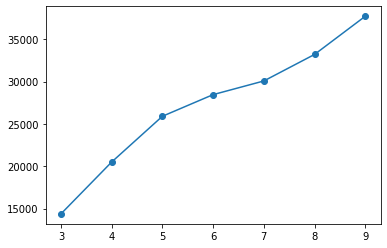

In [ ]:
# scores
plt.scatter(cls_scr_sc.keys(),cls_scr_sc.values())
plt.plot(list(cls_scr_sc.keys()),list(cls_scr_sc.values()))


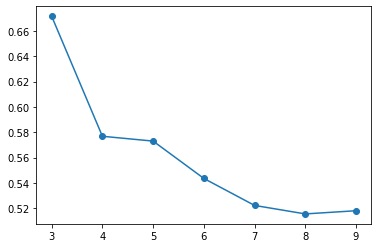

In [ ]:
# scores
plt.scatter(cls_scr_r.keys(),cls_scr_r.values())
plt.plot(list(cls_scr_r.keys()),list(cls_scr_r.values()))


In [ ]:
evaluate_clustering(X_2d,ag.labels_)

NameError: ignored

In [ ]:
np.unique(ag.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 112, 1022, 2232,  237,  543, 1239, 1504,  123,  197]))

In [99]:
idx_name={i:name for i,name in enumerate(all_data_no.index)}
name_idx={name:i for i,name in enumerate(all_data_no.index)}

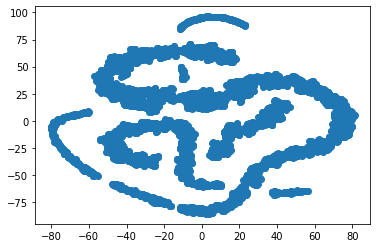

In [100]:
from sklearn.manifold import TSNE
ts=TSNE(2)
X_2d2=ts.fit_transform(X_enc)
import matplotlib.pyplot as plt
plt.scatter(X_2d2[:,0],X_2d2[:,1])

In [ ]:
# plot dendogram
# code from here :https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_enc,'ward')

labelList = range(len(X_enc))

plt.figure(figsize=(10, 12))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
vae.save('/content/drive/MyDrive/0Thiland Coordination/AE Models/vae_model_nooutliers_novi.h5')

In [ ]:
encoder.save('/content/drive/MyDrive/0Thiland Coordination/AE Models/encoder_nooutliers__novi_best.h5')

In [172]:
ag_model,clus_names,clus,=agg_clustering(X_enc,8)

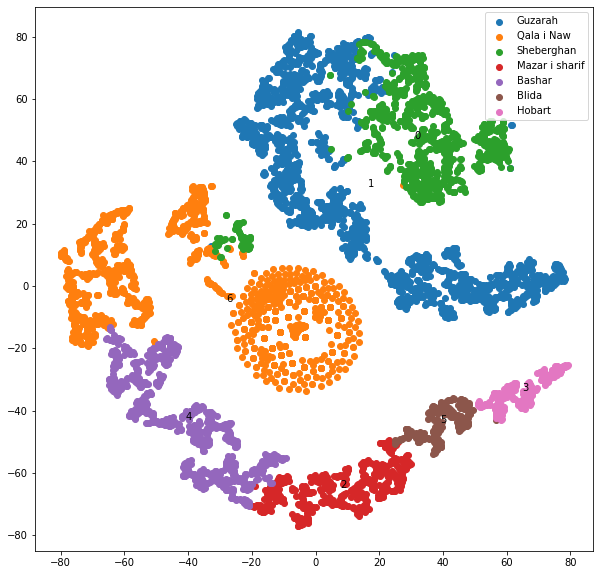

In [85]:
viz_clusters(X_2d,clus_names)

In [ ]:
#Cluster ranges
def plt_ranges_of_clusters(df,clus_names):
  pop_ls=['X1990_Pop','X2015_Pop']
  area_ls=['X1990_area','X2015_area']

  area_r=['2000_area_r','2015_area_r']
  pop_ar=['X2015_area','X2015_Pop']
  ar_arr=['X2015_area','2015_area_r']


  plt_names={'population':pop_ls,'area':area_ls,'Area ratio':area_r,'Pop and Area': pop_ar,'area area_ratio':ar_arr}

  for name in plt_names:
    for k in clus_names:
      _idx=clus_names[k]
      dt=df.loc[_idx,plt_names[name]].values
      plt.scatter(dt[:,0],dt[:,1])
    plt.title(name)
    plt.show()




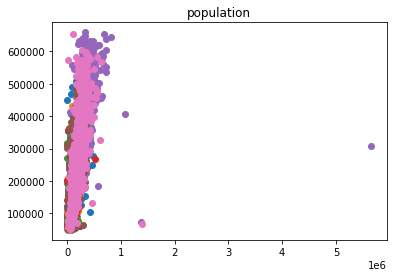

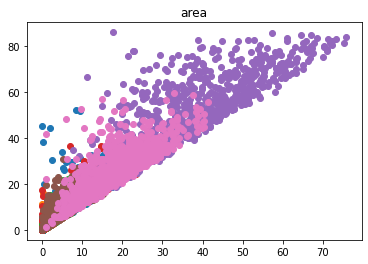

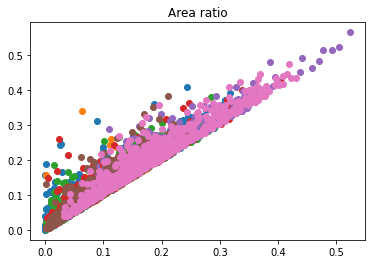

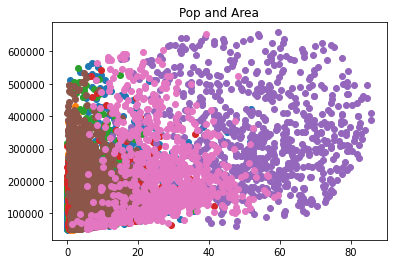

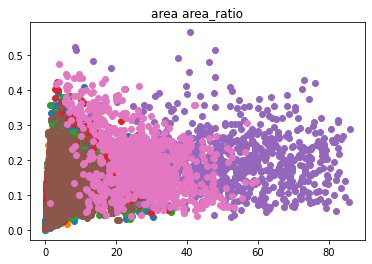

In [ ]:
plt_ranges_of_clusters(all_data_no,clus_names)

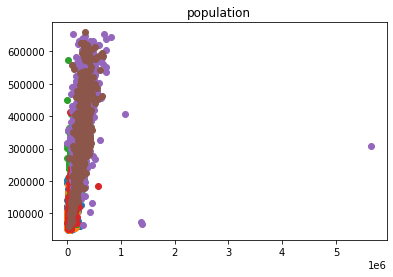

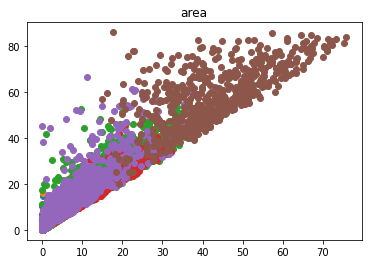

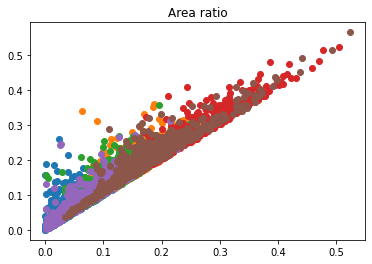

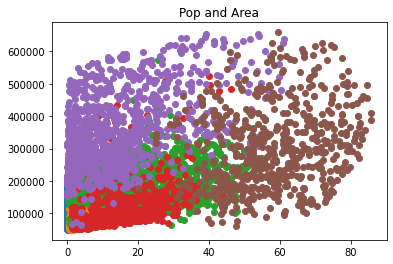

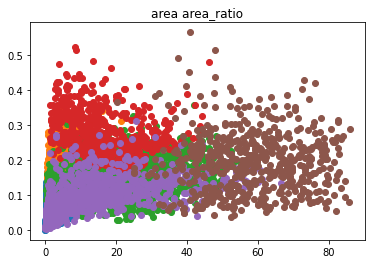

In [ ]:
# repeat without VAE
ag_model2,clus_names2,clus2,=agg_clustering(X_scaled,6)
plt_ranges_of_clusters(all_data_no,clus_names2)

In [ ]:
X_o=all_data_o.iloc[:,inds].values
X_o=(X_o-X_o.mean(0))/X_o.std(0)


In [ ]:
# repeat for outliers
for n_c in range(2,10):
  ag=AgglomerativeClustering(n_clusters=n_c,linkage='ward')
  ag.fit(X_o)
  print(evaluate_clustering(X_o,ag.labels_))
  x,y=np.unique(ag.labels_,return_counts=True)
  print(y)

(0.7583258923317694, 742.0286073310301)
[1342   43]
(0.39142892336215823, 794.6063180021836)
[ 43 517 825]
(0.3936216086562079, 714.6860574914233)
[517  40 825   3]
(0.40684116372746487, 698.0509482631866)
[ 40 168 825   3 349]
(0.4120870208220515, 725.0298074038436)
[825 168  24   3 349  16]
(0.28375253966433217, 726.9322191882685)
[168 349  24   3 579  16 246]
(0.2905999470867944, 722.6927214199255)
[349 579  24   3 135  16 246  33]
(0.27430577410605544, 735.4951241603263)
[ 24 579  16   3 135  97 246  33 252]


In [16]:
idx_name={i:name for i,name in enumerate(all_data_no.index)}
name_idx={name:i for i,name in enumerate(all_data_no.index)}

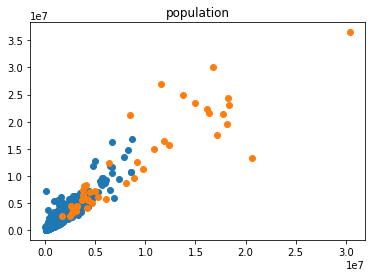

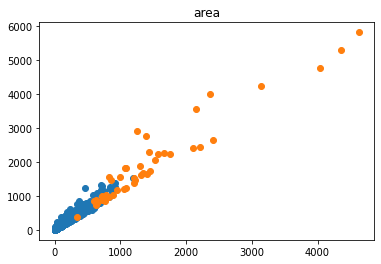

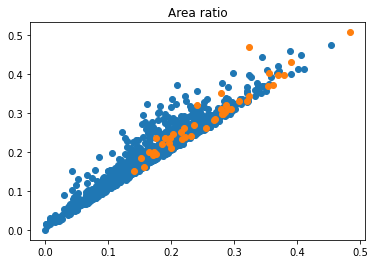

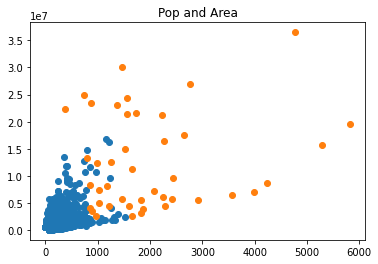

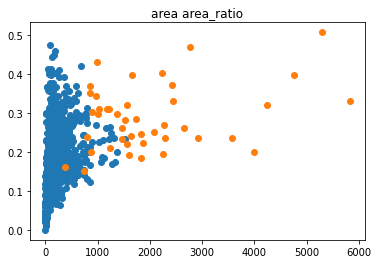

In [ ]:
# repeat without VAE, with outliers
idx_name={i:name for i,name in enumerate(all_data_o.index)}
name_idx={name:i for i,name in enumerate(all_data_o.index)}
ag_model_o,clus_names_o,clus_o,=agg_clustering(X_o,2)
plt_ranges_of_clusters(all_data_o,clus_names_o)

In [ ]:
for k in clus_names_o:
  print(k,len(clus_names_o[k]))

0 1342
1 43


In [ ]:
clus_names_o[1]

['Buenos Aires',
 'Melbourne',
 'Sydney',
 'São Paulo',
 'Toronto',
 'Beijing',
 'Tianjin',
 'Shanghai',
 'Jieyang',
 'Cairo',
 'Paris',
 'Dortmund',
 'Mumbai',
 'Delhi [New Delhi]',
 'Kolkata',
 'Tehran',
 'Milan',
 'Naples',
 'Osaka [Kyoto]',
 'Nagoya',
 'Tokyo',
 'Kuala Lumpur',
 'Mexico City',
 'Rotterdam [The Hague]',
 'Lagos',
 'Quezon City [Manila]',
 'Moscow',
 'Johannesburg',
 'Seoul',
 'Los Angeles',
 'Phoenix',
 'Seattle',
 'Houston',
 'Dallas',
 'Tampa',
 'Minneapolis [Saint Paul]',
 'Miami',
 'Atlanta',
 'Chicago',
 'Washington D.C.',
 'Philadelphia',
 'New York',
 'Boston']

In [ ]:
'Ningjin' in all_data_no.index

True

In [ ]:
n_c=np.random.choice(clus_names[0],5)
n_c

array(['Bhanjanagar', 'Stara Zagora', 'فيانكا Fianga', 'Deir Ez Zor',
       'Papantla de Olarte'], dtype='<U37')

In [15]:
def sample_clus(df,clus_names,n=10):
  dfss=[]
  for k in clus_names:
    n_c=np.random.choice(clus_names[k],n)
    dfss.append(df.loc[n_c].iloc[:,inds])
  
  return pd.concat(dfss)



In [ ]:
sample_clus(all_data_o,clus_names_o,5)

,X1990_area,X2000_area,X2015_area,X1990_Pop,X2000_Pop,X2015_Pop,2015_area_r,2000_area_r,1990_area_r
eFUA_name,,,,,,,,,
Warsaw,396.766542,460.207336,547.232280,2.579283e+06,2.671082e+06,2.866007e+06,0.130886,0.110071,0.094898
Klipgat,105.511948,121.479348,126.375777,5.794174e+05,8.427419e+05,1.290178e+06,0.176749,0.169901,0.147569
Mosul,77.872100,97.715822,110.040232,6.195072e+05,8.243017e+05,1.204497e+06,0.242914,0.215708,0.171903
Cali,77.905646,88.885420,93.604230,1.798036e+06,2.116455e+06,2.391279e+06,0.229422,0.217856,0.190945
Al-Minya,51.347888,59.058247,62.368753,8.418255e+05,1.054368e+06,1.442165e+06,0.121104,0.114676,0.099705
Tianjin,606.226898,671.790628,848.123884,4.127409e+06,5.657747e+06,8.317898e+06,0.351481,0.278405,0.251234
New York,4629.207242,5381.333254,5819.408968,1.815490e+07,1.891228e+07,1.952310e+07,0.332747,0.307698,0.264693
São Paulo,1446.982440,1634.604301,1740.365742,1.633558e+07,1.892224e+07,2.168474e+07,0.286386,0.268982,0.238108
Boston,834.286771,907.524455,963.199098,2.449337e+06,2.614122e+06,2.703568e+06,0.344000,0.324116,0.297960


In [ ]:
sample_clus(all_data_no,clus_names,2)

,X1990_area,X2000_area,X2015_area,X1990_Pop,X2000_Pop,X2015_Pop,2015_area_r,2000_area_r,1990_area_r
eFUA_name,,,,,,,,,
Pudhuvayal,0.023533,0.102849,0.302445,62778.032852,121767.035550,140329.391524,0.008641,0.002939,0.000672
Kaliyaganj,1.499707,1.507023,1.677478,62552.657778,79425.102197,95679.990310,0.111832,0.100468,0.099980
Magway,3.723714,6.922604,8.357546,84853.168593,155572.023270,169519.628415,0.116077,0.096147,0.051718
Kyaukpadaung,3.186629,4.707789,5.326820,49986.506544,78305.556264,86183.272696,0.147967,0.130772,0.088517
Labé,8.715398,11.590002,12.078175,70555.011861,115189.531874,182484.004896,0.175046,0.167971,0.126310
Kodur,0.247773,0.510715,0.561281,68824.831388,71136.864483,71393.416289,0.080183,0.072959,0.035396
M'banza Congo,3.228740,3.228740,6.309790,16310.056917,45630.642831,143495.759736,0.101771,0.052076,0.052076
Zongyang,2.174276,3.195486,5.537272,114520.965606,117848.232193,130286.041143,0.062217,0.035904,0.024430
Huaihua,21.192820,21.338614,28.249981,503260.223458,536006.873071,538684.280836,0.114837,0.086742,0.086150


In [ ]:
sample_clus(all_data_no,clus_names2,2)

,X1990_area,X2000_area,X2015_area,X1990_Pop,X2000_Pop,X2015_Pop,2015_area_r,2000_area_r,1990_area_r
eFUA_name,,,,,,,,,
Jinotega,1.120111,2.078495,2.403661,69456.924756,92541.568724,118728.030805,0.058626,0.050695,0.027320
Tambogrande,0.538822,0.859613,1.088367,44856.836521,60251.057896,77548.997176,0.016744,0.013225,0.008290
Pitalito,1.685757,4.058304,4.630927,60813.435152,84657.688834,119480.067777,0.243733,0.213595,0.088724
Shihr,1.868113,3.706042,3.919852,40442.081859,59583.820377,87395.696596,0.230580,0.218002,0.109889
Cuauhtémoc,12.701954,19.907982,24.133323,70753.325345,97621.671780,140919.483626,0.106785,0.088088,0.056203
Pavia,26.987541,31.448984,37.110011,119541.274662,123581.387555,142505.437149,0.107565,0.091156,0.078225
Oicha,6.003481,6.308469,8.016937,53042.402471,48500.147717,69736.671819,0.348562,0.274281,0.261021
Hưng Yên,9.249156,12.741822,16.205211,109726.957470,126088.615042,136156.711663,0.241869,0.190176,0.138047
Arak,20.217350,27.925866,30.178755,337164.302820,506320.842185,526057.396305,0.166733,0.154287,0.111698
